<a href="https://colab.research.google.com/github/jamilaandimen/MLCoursera/blob/master/Feature_Matching.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Brute-Force Matching with ORB Descriptors

In [0]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

img1 = cv2.imread('Tonijn-yellowfin.jpg',0)          # queryImage
img2 = cv2.imread('Q35Y.png',0) # trainImage

# Initiate SIFT detector

orb = cv2.ORB_create()        # Initiate SIFT detector

# find the keypoints and descriptors with SIFT
kp1, des1 = orb.detectAndCompute(img1,None)
kp2, des2 = orb.detectAndCompute(img2,None)

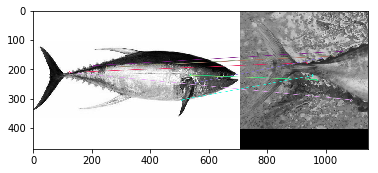

(<matplotlib.image.AxesImage at 0x7fcbc69ef1d0>, None)

In [2]:
# create BFMatcher object
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

# Match descriptors.
matches = bf.match(des1,des2)

# Sort them in the order of their distance.
matches = sorted(matches, key = lambda x:x.distance)

# Draw first 10 matches.
img3 = cv2.drawMatches(img1,kp1,img2,kp2,matches[:10], None,flags=2)

plt.imshow(img3),plt.show()


# Brute-Force Matching with SIFT Descriptors and Ratio Test

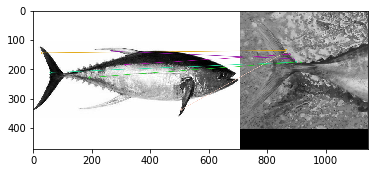

(<matplotlib.image.AxesImage at 0x7fcbc2292b38>, None)

In [4]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

img1 = cv2.imread('Tonijn-yellowfin.jpg',0)          # queryImage
img2 = cv2.imread('Q35Y.png',0) # trainImage

# Initiate SIFT detector
!pip install opencv-python==3.4.2.16

!pip install opencv-contrib-python==3.4.2.16
#!pip3 install opencv-contrib-python==3.4.5.20
#sift = cv2.SIFT()
sift = cv2.xfeatures2d.SIFT_create()

# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)

# BFMatcher with default params
bf = cv2.BFMatcher()
matches = bf.knnMatch(des1,des2, k=2)

# Apply ratio test
good = []
for m,n in matches:
    if m.distance < 0.75*n.distance:
        good.append([m])

# cv2.drawMatchesKnn expects list of lists as matches.
img3 = cv2.drawMatchesKnn(img1,kp1,img2,kp2,good,None,flags=2)

plt.imshow(img3),plt.show()

# FLANN based Matcher

In [0]:
FLANN_INDEX_LINEAR = 0
FLANN_INDEX_KDTREE = 1
FLANN_INDEX_KMEANS = 2
FLANN_INDEX_COMPOSITE = 3
FLANN_INDEX_KDTREE_SINGLE = 4
FLANN_INDEX_HIERARCHICAL = 5
FLANN_INDEX_LSH = 6
FLANN_INDEX_SAVED = 254
FLANN_INDEX_AUTOTUNED = 255
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)

In [0]:
index_params= dict(algorithm = FLANN_INDEX_LSH,
                   table_number = 6, # 12
                   key_size = 12,     # 20
                   multi_probe_level = 1) #2

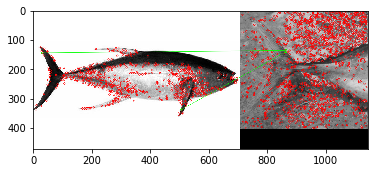

(<matplotlib.image.AxesImage at 0x7fcbc21abe80>, None)

In [15]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

img1 = cv2.imread('Tonijn-yellowfin.jpg',0)          # queryImage
img2 = cv2.imread('Q35Y.png',0) # trainImage
# Initiate SIFT detector
sift = cv2.xfeatures2d.SIFT_create()

# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)

# FLANN parameters
FLANN_INDEX_KDTREE = 0
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks=50)   # or pass empty dictionary

flann = cv2.FlannBasedMatcher(index_params,search_params)

matches = flann.knnMatch(des1,des2,k=2)

# Need to draw only good matches, so create a mask
matchesMask = [[0,0] for i in range(len(matches))]

# ratio test as per Lowe's paper
for i,(m,n) in enumerate(matches):
    if m.distance < 0.7*n.distance:
        matchesMask[i]=[1,0]

draw_params = dict(matchColor = (0,255,0),
                   singlePointColor = (255,0,0),
                   matchesMask = matchesMask,
                   flags = 0)

img3 = cv2.drawMatchesKnn(img1,kp1,img2,kp2,matches,None,**draw_params)

plt.imshow(img3,),plt.show()